<a href="https://colab.research.google.com/github/sofiatil/NeuralNetworks-Python2/blob/main/ComparingBasicRNNArchitectures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, max_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the input and output data and normalize them
path_prefix = '/content/drive/MyDrive/Neural Networks - assignment 2/'
max_agg_file = path_prefix + 'CoffeeMachinemaxAgg.txt'
max_app_file = path_prefix + 'CoffeeMachinemaxApp.txt'
input_data_file = path_prefix + 'Input_Data.txt'
output_data_file = path_prefix + 'Output_Data.txt'

# Φόρτωση των αρχείων κανονικοποίησης
with open(max_agg_file, 'r') as f:
    max_agg = float(f.read().strip())

with open(max_app_file, 'r') as f:
    max_app = float(f.read().strip())

# Φόρτωση και κανονικοποίηση των δεδομένων
def load_and_normalize(file_path, max_value):
    data = np.genfromtxt(file_path, delimiter=',')
    return data / max_value

input_data = load_and_normalize(input_data_file, max_agg)
output_data = load_and_normalize(output_data_file, max_app)

seq_length = np.shape(input_data)[1]



In [ ]:
# Προετοιμασία των δεδομένων
def prepare_data(input_data, output_data):
    X = input_data
    y = output_data
    X = np.expand_dims(X, axis=-1)
    y = np.expand_dims(y, axis=-1)
    print(np.shape(X))
    return X, y

X, y = prepare_data(input_data, output_data)
X_train, X_test = X[:int(0.8*len(X))], X[int(0.8*len(X)):]
y_train, y_test = y[:int(0.8*len(y))], y[int(0.8*len(y)):]

def create_model(model_type, input_shape):
    model = Sequential()
    if model_type == 'RNN':
        model.add(SimpleRNN(64, input_shape=input_shape, activation='relu', return_sequences=True))
    elif model_type == 'LSTM':
        model.add(LSTM(64, input_shape=input_shape, activation='relu', return_sequences=True))
    elif model_type == 'GRU':
        model.add(GRU(64, input_shape=input_shape, activation='relu', return_sequences=True))
    model.add(Dense(seq_length))
    model.compile(optimizer=Adam(), loss=MeanSquaredError())
    return model

input_shape = (seq_length, 1)
epochs = 10

# Εκπαίδευση των μοντέλων
model_lstm = create_model('LSTM', input_shape)
history_lstm = model_lstm.fit(X_train, y_train, epochs=epochs, validation_split=0.2,callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])

model_rnn = create_model('RNN', input_shape)
history_rnn = model_rnn.fit(X_train, y_train, epochs=epochs, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])

model_gru = create_model('GRU', input_shape)
history_gru = model_gru.fit(X_train, y_train, epochs=epochs, validation_split=0.2,callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])



(50000, 40, 1)
Epoch 1/10
1000/1000 [==============================] - 25s 23ms/step - loss: 4.1443e-08 - val_loss: 3.2533e-08
Epoch 2/10
 262/1000 [======>.......................] - ETA: 17s - loss: 3.9368e-08

KeyboardInterrupt: 

In [ ]:
# # Προετοιμασία των δεδομένων
# def prepare_data(input_data, output_data, window_size):
#     X, y = [], []
#     for i in range(len(input_data)):
#         #X.append(input_data[i:i+window_size])
#         X.append(input_data[i])
#         #y.append(output_data[i:i+window_size])
#         y.append(output_data[i])
#     X = np.array(X)
#     y = np.array(y)
#     # Προσθέτουμε διάσταση ώστε τα δεδομένα να έχουν σχήμα (num_samples, window_size, 1)
#     X = np.expand_dims(X, axis=-1)
#     y = np.expand_dims(y, axis=-1)
#     print(np.shape(X))
#     return X, y

# window_size = 40
# X, y = prepare_data(input_data, output_data, window_size)
# X_train, X_test = X[:int(0.8*len(X))], X[int(0.8*len(X)):]
# y_train, y_test = y[:int(0.8*len(y))], y[int(0.8*len(y)):]



(50000, 40, 1)


In [ ]:
print(np.shape(input_data))

(50000, 40)


In [ ]:

# #Divide the initial dataset in train and test sets
num_samples = np.shape(input_data)[0]
train_ratio = 0.8
seq_length = np.shape(input_data)[1]
train_size = int(train_ratio * num_samples)

# shuffle the data
shuffled_idx = np.arange(num_samples)
np.random.shuffle(shuffled_idx)
shuffled_idx_train = shuffled_idx[:train_size]
shuffled_idx_test = shuffled_idx[train_size:]

X_train, X_test = input_data[shuffled_idx_train], input_data[shuffled_idx_test]
y_train, y_test = output_data[shuffled_idx_train], output_data[shuffled_idx_test]


# Configure the input and output shapes to be the apropriate for each architecture

# Define LSTM input-ouput shapes
X_train = X_train.reshape((X_train.shape[0], seq_length,1))
X_test = X_test.reshape((X_test.shape[0], seq_length,1))
y_train = y_train.reshape((y_train.shape[0], seq_length,1))
y_test = y_test.reshape((y_test.shape[0], seq_length,1))

# print(np.shape(X_train_lstm))
# print(np.shape(y_train_lstm))




In [ ]:
 # Create a model of a specific architecure(RNN, GRU or LSTM)
def create_model(model_type, input_shape):
     model = Sequential()
     if model_type == 'RNN':
         model.add(SimpleRNN(64, input_shape=input_shape, activation='relu', return_sequences=True))
         model.add(SimpleRNN(64, input_shape=input_shape, activation='relu', return_sequences=True))
         model.add(SimpleRNN(64, input_shape=input_shape, activation='relu', return_sequences=True))

     elif model_type == 'LSTM':
         model.add(LSTM(64, input_shape=input_shape,   return_sequences=True))
         model.add(LSTM(64, input_shape=input_shape, return_sequences=True))
         model.add(LSTM(64, input_shape=input_shape, return_sequences=True))

     elif model_type == 'GRU':
         model.add(GRU(64, input_shape=input_shape,activation='relu', return_sequences=True))
         model.add(GRU(64, input_shape=input_shape, activation='relu', return_sequences=True))
         model.add(GRU(64, input_shape=input_shape, activation='relu', return_sequences=True))


     model.add(Dense(1))
     model.compile(optimizer=Adam(), loss=MeanSquaredError())
     return model



Epoch 1/30
1000/1000 [==============================] - 71s 65ms/step - loss: 9.5480e-07 - val_loss: 2.8490e-08
Epoch 2/30
1000/1000 [==============================] - 62s 62ms/step - loss: 4.2575e-08 - val_loss: 5.6172e-08
Epoch 3/30
1000/1000 [==============================] - 62s 62ms/step - loss: 4.7450e-08 - val_loss: 3.9181e-08
Epoch 4/30
1000/1000 [==============================] - 62s 62ms/step - loss: 5.5657e-08 - val_loss: 7.3302e-08
Epoch 5/30
1000/1000 [==============================] - 67s 67ms/step - loss: 6.8430e-08 - val_loss: 6.4740e-08
Epoch 6/30
1000/1000 [==============================] - 62s 62ms/step - loss: 5.7756e-08 - val_loss: 3.3697e-08


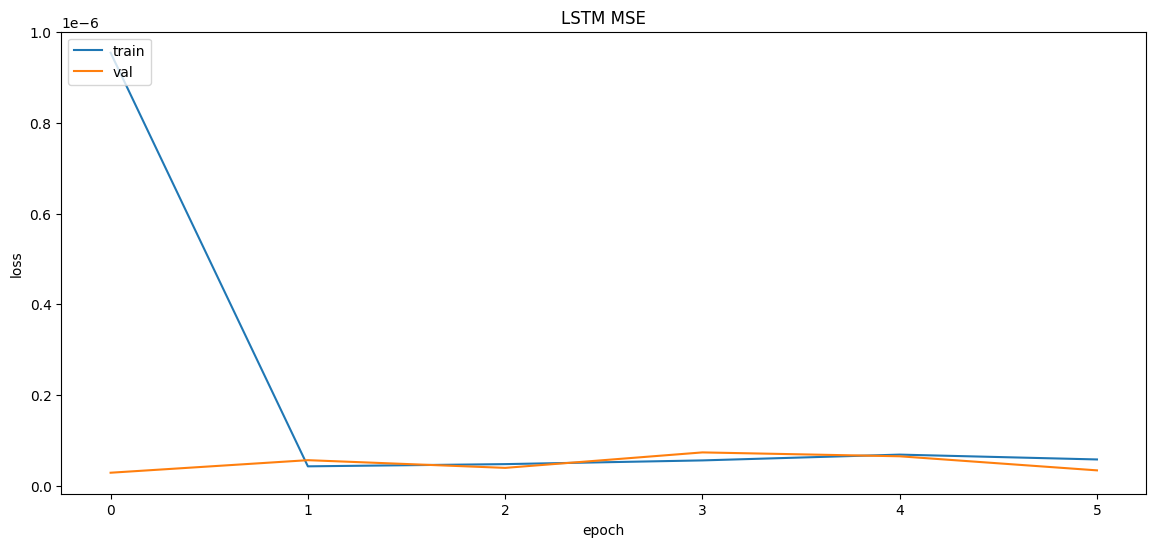

Epoch 1/30
1000/1000 [==============================] - 33s 31ms/step - loss: 6.4870e-08 - val_loss: 3.2178e-08
Epoch 2/30
1000/1000 [==============================] - 30s 30ms/step - loss: 5.2593e-08 - val_loss: 2.7931e-08
Epoch 3/30
1000/1000 [==============================] - 30s 30ms/step - loss: 4.7678e-08 - val_loss: 2.8552e-08
Epoch 4/30
1000/1000 [==============================] - 30s 30ms/step - loss: 4.9722e-08 - val_loss: 2.8178e-08
Epoch 5/30
1000/1000 [==============================] - 31s 31ms/step - loss: 4.6010e-08 - val_loss: 3.5222e-08
Epoch 6/30
1000/1000 [==============================] - 30s 30ms/step - loss: 4.6654e-08 - val_loss: 3.3928e-08
Epoch 7/30
1000/1000 [==============================] - 30s 30ms/step - loss: 4.6882e-08 - val_loss: 3.0429e-08


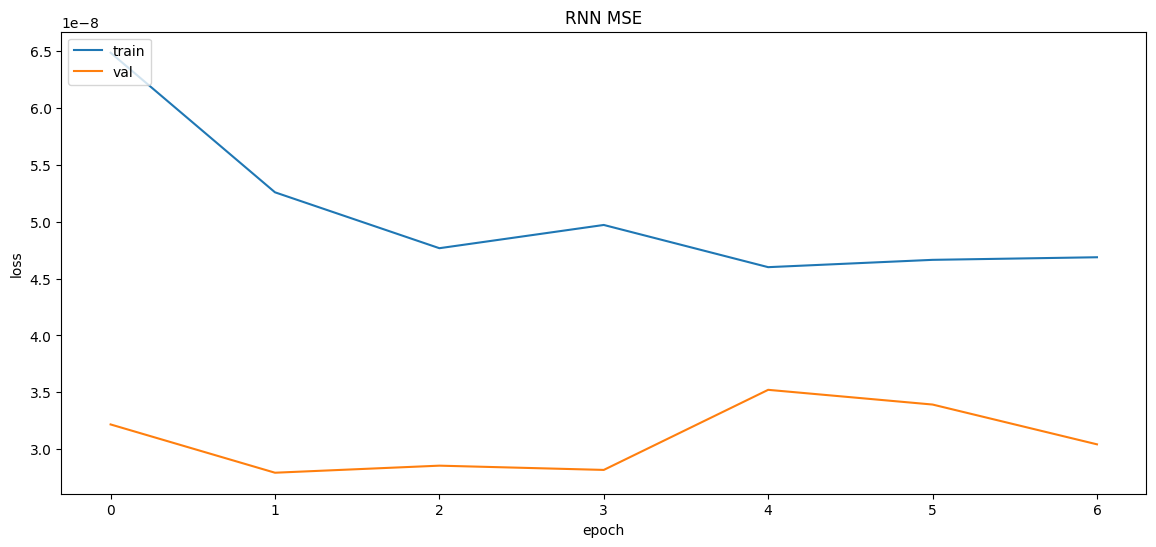

Epoch 1/30
1000/1000 [==============================] - 57s 54ms/step - loss: 6.8295e-08 - val_loss: 3.1376e-08
Epoch 2/30
1000/1000 [==============================] - 52s 52ms/step - loss: 4.1120e-08 - val_loss: 2.8510e-08
Epoch 3/30
1000/1000 [==============================] - 54s 54ms/step - loss: 4.1904e-08 - val_loss: 2.8518e-08
Epoch 4/30
1000/1000 [==============================] - 52s 52ms/step - loss: 4.3384e-08 - val_loss: 5.5821e-08
Epoch 5/30
1000/1000 [==============================] - 53s 53ms/step - loss: 4.3047e-08 - val_loss: 8.2587e-08
Epoch 6/30
1000/1000 [==============================] - 52s 52ms/step - loss: 4.3290e-08 - val_loss: 2.9564e-08
Epoch 7/30
1000/1000 [==============================] - 66s 66ms/step - loss: 4.4399e-08 - val_loss: 2.8642e-08


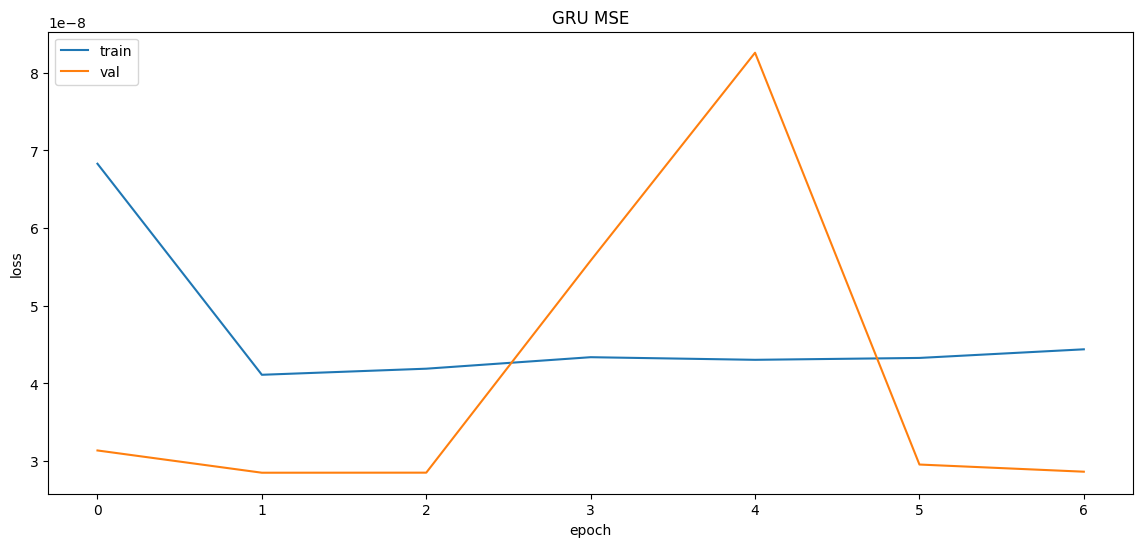

In [ ]:
# Train LSTM
epochs = 30
input_shape = (seq_length,1)


model_lstm = create_model('LSTM', input_shape)
model_lstm.compile(optimizer=Adam(), loss=MeanSquaredError())
history_lstm = model_lstm.fit(X_train, y_train, epochs=epochs, validation_split=0.2, callbacks=[\
                                                              tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss',restore_best_weights=True)])
plt.figure(figsize=(14,6))
plt.plot(history_lstm.history[list(history_lstm.history.keys())[0]])
plt.plot(history_lstm.history[list(history_lstm.history.keys())[1]])
plt.title('LSTM MSE')
plt.ylabel(list(history_lstm.history.keys())[0])
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


model_rnn = create_model('RNN', input_shape)
model_rnn.compile(optimizer=Adam(), loss=MeanSquaredError())
history_rnn = model_rnn.fit(X_train, y_train, epochs=epochs, validation_split=0.2,callbacks=[\
                                                              tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss',restore_best_weights=True)])
plt.figure(figsize=(14,6))
plt.plot(history_rnn.history[list(history_rnn.history.keys())[0]])
plt.plot(history_rnn.history[list(history_rnn.history.keys())[1]])
plt.title('RNN MSE')
plt.ylabel(list(history_rnn.history.keys())[0])
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


model_gru = create_model('GRU', input_shape)
model_gru.compile(optimizer=Adam(), loss=MeanSquaredError())
history_gru = model_gru.fit(X_train, y_train, epochs=epochs, validation_split=0.2, callbacks=[\
                                                              tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss',restore_best_weights=True)])

plt.figure(figsize=(14,6))
plt.plot(history_gru.history[list(history_gru.history.keys())[0]])
plt.plot(history_gru.history[list(history_gru.history.keys())[1]])
plt.title('GRU MSE')
plt.ylabel(list(history_gru.history.keys())[0])
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [ ]:
# evaluate the trained models and plot the models' performance in the test set


# LSTM
y_pred_lstm_train = model_lstm.predict()
y_pred_lstm_test = model_lstm.predict(X_test)

mae_lstm_train = mean_absolute_error(y_train, y_pred_lstm_train)
mae_lstm_test = mean_absolute_error(y_test, y_pred_lstm_test)

max_error_lstm_train = max_error(y_train, y_pred_lstm_train)
max_error_lstm_test = max_error(y_test, y_pred_lstm_test)

rmse_lstm_train = mean_squared_error(y_train, y_pred_lstm_train)
rmse_lstm_test = mean_squared_error(y_test, y_pred_lstm_test)


# ----------------------------------------------------------------------------------

# RNN
y_pred_rnn_train = model_rnn.predict(X_train)
y_pred_rnn_test = model_rnn.predict(X_test)

mae_rnn_train = mean_absolute_error(y_train, y_pred_rnn_train)
mae_rnn_test = mean_absolute_error(y_test, y_pred_rnn_test)

max_error_rnn_train = max_error(y_train, y_pred_rnn_train)
max_error_rnn_test = max_error(y_test, y_pred_rnn_test)

rmse_rnn_train = root_mean_squared_error(y_train, y_pred_rnn_train)
rmse_rnn_test = root_mean_squared_error(y_test, y_pred_rnn_test)



# ------------------------------------------------------------------------------------------------------------

# GRU

y_pred_gru_train = model_gru.predict(X_train)
y_pred_gru_test = model_gru.predict(X_test)

mae_gru_train = mean_absolute_error(y_train, y_pred_gru_train)
mae_gru_test = mean_absolute_error(y_test, y_pred_gru_test)

max_error_gru_train = max_error(y_train, y_pred_gru_train)
max_error_gru_test = max_error(y_test, y_pred_gru_test)

rmse_gru_train = root_mean_squared_error(y_train, y_pred_gru_train)
rmse_gru_test = root_mean_squared_error(y_test, y_pred_gru_test)




In [ ]:
# Αξιολόγηση των μοντέλων
loss_lstm = model_lstm.evaluate(X_test, y_test)
loss_rnn = model_rnn.evaluate(X_test, y_test)
loss_gru = model_gru.evaluate(X_test, y_test)
print(f"LSTM loss: {loss_lstm}")
print(f"RNN loss: {loss_rnn}")
print(f"GRU loss: {loss_gru}")


313/313 [==============================] - 3s 9ms/step - loss: 4.1521e-08
LSTM loss: 4.01251121218138e-08
RNN loss: 3.431050288327242e-08
GRU loss: 4.1520770821534825e-08


In [ ]:
# Προβλέψεις
# y_pred_lstm = model_lstm.predict(X_test)
# y_pred_rnn = model_rnn.predict(X_test)
# y_pred_gru = model_gru.predict(X_test)

y_pred_lstm = model_lstm.predict(X_test).squeeze()
y_pred_rnn = model_rnn.predict(X_test).squeeze()
y_pred_gru = model_gru.predict(X_test).squeeze()



313/313 [==============================] - 3s 9ms/step


In [ ]:
# Υπολογισμός μετρικών απόδοσης
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

mae_rnn = mean_absolute_error(y_test, y_pred_rnn)
mse_rnn = mean_squared_error(y_test, y_pred_rnn)
r2_rnn = r2_score(y_test, y_pred_rnn)

mae_gru = mean_absolute_error(y_test, y_pred_gru)
mse_gru = mean_squared_error(y_test, y_pred_gru)
r2_gru = r2_score(y_test, y_pred_gru)



ValueError: Found array with dim 3. None expected <= 2.

In [ ]:
# Εκτύπωση αποτελεσμάτων
print(f"LSTM - MAE: {mae_lstm:.4f}, MSE: {mse_lstm:.4f}, R²: {r2_lstm:.4f}")
print(f"RNN - MAE: {mae_rnn:.4f}, MSE: {mse_rnn:.4f}, R²: {r2_rnn:.4f}")
print(f"GRU - MAE: {mae_gru:.4f}, MSE: {mse_gru:.4f}, R²: {r2_gru:.4f}")


NameError: name 'mae_lstm' is not defined

In [ ]:
# Οπτικοποίηση αποτελεσμάτων
plt.figure(figsize=(14, 5))
plt.plot(y_test[0], label='True')
plt.plot(y_pred_lstm[0], label='LSTM')
plt.plot(y_pred_rnn[0], label='RNN')
plt.plot(y_pred_gru[0], label='GRU')
plt.legend()
plt.show()

In [ ]:
# Οπτικοποίηση ιστορικού εκπαίδευσης
def plot_history(history, model_name):
    plt.figure(figsize=(14, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

plot_history(history_lstm, 'LSTM')
plot_history(history_rnn, 'RNN')
plot_history(history_gru, 'GRU')